In [1]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather

#move up in directory
os.chdir('../')
# os.getcwd()

In [2]:
from helpers import dot2_

In [3]:
path_to_test_runs = 'data/rnn_raw_data/'

In [4]:
# CONFIG
NUM_IDS = 10
NUM_RUNS = 10
TEST_SDS = np.arange(0.02, 0.34, 0.02)

In [1]:
def get_median_by_id_sd(train_sd, test_sd_range, num_runs, num_ids, reward_type):   
    i = 0
    # convert float to str
    for id_ in range(NUM_IDS):
            for sd in TEST_SDS:
                            
                test_sd = dot2_(sd)

                if i == 0:
                    all_test_runs = pickle.load(open(path_to_test_runs + 'all_{}_test_runs_train_sd_{}_id_{}_test_sd_{}'.format(reward_type, train_sd, id_, test_sd), 'rb'))                
                    all_means_by_id_sd = all_test_runs.groupby(['rnn_id', 'rnn_test_sd']).accuracy.mean()

                else:
                    all_test_runs = pickle.load(open(path_to_test_runs + 'all_{}_test_runs_train_sd_{}_id_{}_test_sd_{}'.format(reward_type, train_sd, id_, test_sd), 'rb'))
                    means_by_id_sd = all_test_runs.groupby(['rnn_id', 'rnn_test_sd']).accuracy.mean()
                    all_means_by_id_sd = pd.concat([all_means_by_id_sd, means_by_id_sd])
                i += 1
                
    return(all_means_by_id_sd)

In [2]:
# get number of switches per run and instance for one sd

def get_mean_switches_by_id_sd(train_sd, test_sd_range, num_runs, num_ids, reward_type):   
    i = 0
    # convert float to str
    for id_ in range(NUM_IDS):
            for sd in TEST_SDS:
                            
                test_sd = dot2_(sd)

                if i == 0:
                    all_test_runs = pickle.load(open(path_to_test_runs + 'all_{}_test_runs_train_sd_{}_id_{}_test_sd_{}'.format(reward_type, train_sd, id_, test_sd), 'rb'))                
                    is_switch = [int(all_test_runs.choice[t] != all_test_runs.choice[t-1]) for t in range(1, len(all_test_runs.choice))]
                    is_switch = np.append(0, is_switch)
                    all_test_runs['is_switch'] = is_switch                    
                    all_mean_switches_by_id_sd = all_test_runs.groupby(['rnn_id', 'rnn_test_sd']).is_switch.mean()

                else:
                    all_test_runs = pickle.load(open(path_to_test_runs + 'all_{}_test_runs_train_sd_{}_id_{}_test_sd_{}'.format(reward_type, train_sd, id_, test_sd), 'rb'))
                    is_switch = [int(all_test_runs.choice[t] != all_test_runs.choice[t-1]) for t in range(1, len(all_test_runs.choice))]
                    is_switch = np.append(0, is_switch)
                    all_test_runs['is_switch'] = is_switch
                    mean_switches_by_id_sd = all_test_runs.groupby(['rnn_id', 'rnn_test_sd']).is_switch.mean()
                    all_mean_switches_by_id_sd = pd.concat([all_mean_switches_by_id_sd, mean_switches_by_id_sd])
                i += 1
                
    return(all_mean_switches_by_id_sd)

# Binary Rewards

In [7]:
mean_acc_05 = get_means_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

mean_acc_1 = get_means_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

mean_acc_meta = get_means_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

In [8]:
df1 = mean_acc_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = mean_acc_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = mean_acc_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

# create hue variables
df1['train_sd'] =  mean_acc_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
df2['train_sd'] =  mean_acc_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
df3['train_sd'] =  mean_acc_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']


binary_plot_data = pd.concat([df1, df2, df3])

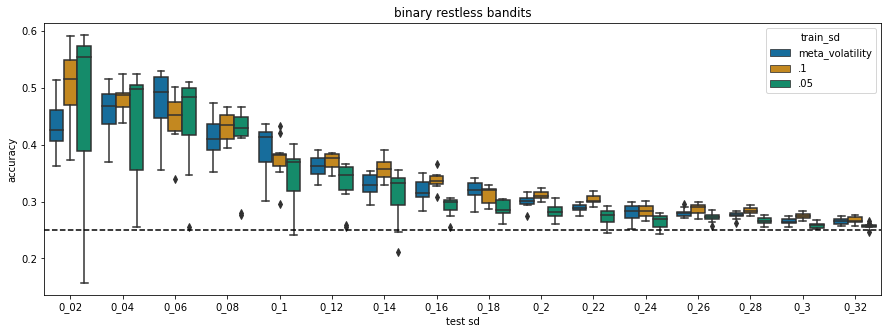

In [27]:
# plot boxplot
plt.figure(figsize=(15, 5))

box = sns.boxplot(x = 'rnn_test_sd', y = 'accuracy', hue = 'train_sd', data=binary_plot_data, 
                 palette="colorblind")

box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='test sd', 
    ylabel='accuracy')

box.set_title('binary restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(dot2_(i))
box.set_xticklabels(x_ticks)            

plt.show()

## Number of Switches

In [10]:
mean_switches_05 = get_mean_switches_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

mean_switches_1 = get_mean_switches_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

mean_switches_meta = get_mean_switches_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'binary')

In [11]:
df1 = mean_switches_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = mean_switches_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = mean_switches_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

# create hue variables
df1['train_sd'] =  mean_switches_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
df2['train_sd'] =  mean_switches_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
df3['train_sd'] =  mean_switches_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']


binary_switch_plot_data = pd.concat([df1, df2, df3])

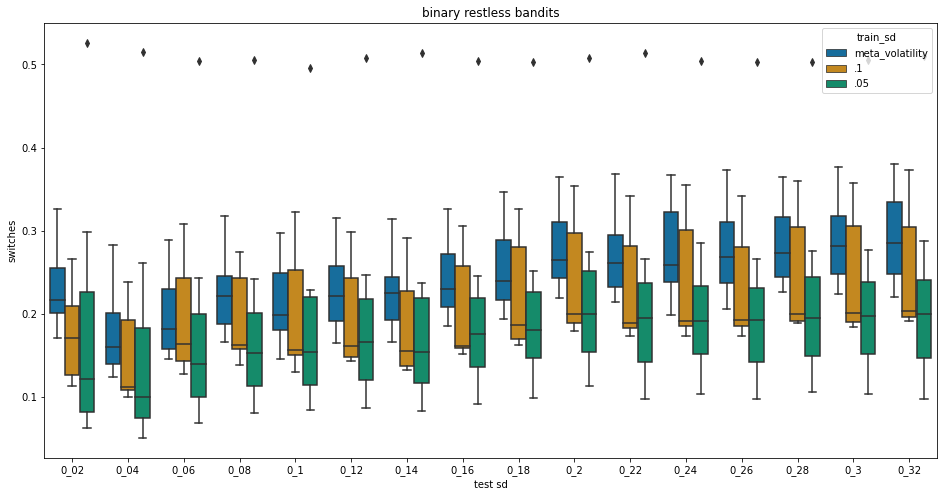

In [12]:
# plot boxplot
plt.figure(figsize=(16, 8))

box = sns.boxplot(x = 'rnn_test_sd', y = 'is_switch', hue = 'train_sd', data=binary_switch_plot_data, 
                 palette="colorblind")

# box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='test sd', 
    ylabel='switches')

box.set_title('binary restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(dot2_(i))
box.set_xticklabels(x_ticks)            

plt.show()

# Continuous Rewards

In [3]:
mean_acc_05 = get_means_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

mean_acc_1 = get_means_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

mean_acc_meta = get_means_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

#all_lstm_ac_continuous_test_runs_train_sd_meta_volatility_id_9_test_sd_0_32

mean_acc_lstm_meta = get_means_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'lstm_ac_continuous')

NameError: name 'get_means_by_id_sd' is not defined

In [2]:
mean_acc_lstm_meta

NameError: name 'mean_acc_lstm_meta' is not defined

In [13]:
df1 = mean_acc_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = mean_acc_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = mean_acc_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

df4 = mean_acc_lstm_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})


In [15]:
# create hue variables
df1['train_sd'] =  mean_acc_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
df2['train_sd'] =  mean_acc_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
df3['train_sd'] =  mean_acc_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']

df4['train_sd'] =  mean_acc_lstm_meta.reset_index(level='rnn_test_sd').shape[0] * ['lstm + AC + meta_volatility']

cont_plot_data = pd.concat([df1, df2, df3, df4])

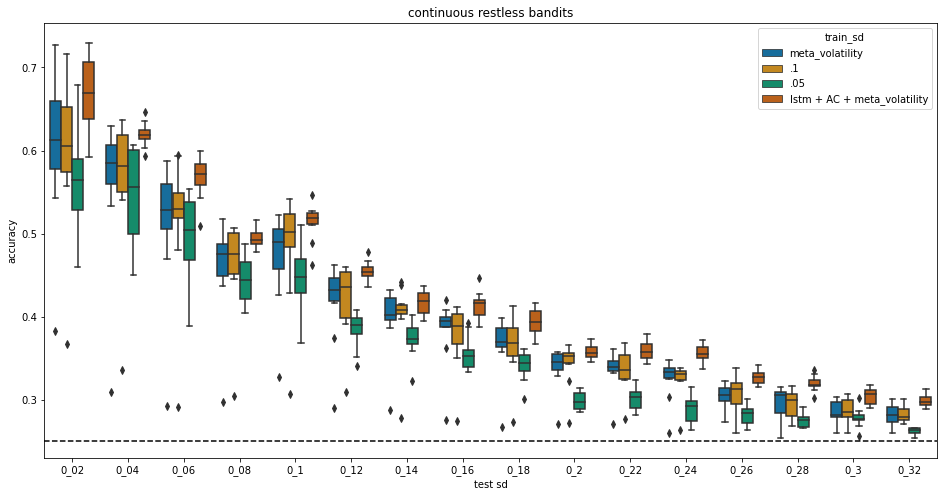

In [16]:
# plot boxplot
plt.figure(figsize=(16, 8))

box = sns.boxplot(x = 'rnn_test_sd', y = 'accuracy', hue = 'train_sd', data=cont_plot_data, 
                 palette="colorblind")

box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='test sd', 
    ylabel='accuracy')

box.set_title('continuous restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(dot2_(i))
box.set_xticklabels(x_ticks)            

plt.show()

## Number of switches


In [19]:
mean_switch_05 = get_mean_switches_by_id_sd(train_sd = '.05'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

mean_switch_1 = get_mean_switches_by_id_sd(train_sd = '.1'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

mean_switch_meta = get_mean_switches_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'continuous')

mean_switch_lstm_meta = get_mean_switches_by_id_sd(train_sd = 'meta_volatility'
                   , test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , reward_type = 'lstm_ac_continuous')

In [21]:
df1 = mean_switch_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df2 = mean_switch_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
df3 = mean_switch_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

df4=  mean_switch_lstm_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})


In [24]:
# create hue variables
df1['train_sd'] =  mean_switch_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
df2['train_sd'] =  mean_switch_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
df3['train_sd'] =  mean_switch_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']

df4['train_sd'] =  mean_switch_lstm_meta.reset_index(level='rnn_test_sd').shape[0] * ['lstm + AC + meta_volatility']

cont_switch_plot_data = pd.concat([df1, df2, df3, df4])

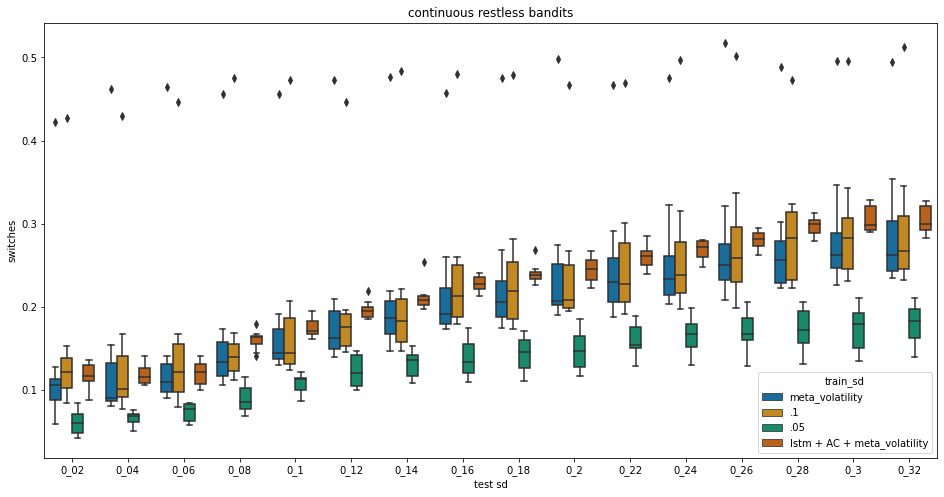

In [25]:
# plot boxplot
plt.figure(figsize=(16, 8))

box = sns.boxplot(x = 'rnn_test_sd', y = 'is_switch', hue = 'train_sd', data=cont_switch_plot_data, 
                 palette="colorblind")

# box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='test sd', 
    ylabel='switches')

box.set_title('continuous restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(dot2_(i))
box.set_xticklabels(x_ticks)            

plt.show()
